# Build Neural Networks with PyTorch
Copyright 2022, LEAKY.AI LLC

This exercise is intended for students taking our Introduction to Deep Learning with PyTorch course at https://www.leaky.ai. In this exercise, we will build some very simple neural networks using PyTorch and explore their properties.

In this assingment you will:
- Use Google Colab to define neural networks using PyTorch
- Learn how to build build more complex models with hidden layers
- Learn how to select the appropriate output activation function
- Understand how to estimate the model size
- Explore the model’s weights and bias settings

In order to complete this assignment:
1.	Copy the following link: https://github.com/LeakyAI/PyTorch-Overview
2.	Head over to Colab: https://colab.research.google.com/
3.	Click on GitHub and paste in the repo link above
4.	Click the magnify icon on the right side of the link you pasted above
5.	Click on the <b>Building Neural Networks.ipynb</b> notebook to get started

Next, replace the <b>[TBD]</b> parts below with your code and execute all the cells.  Most cells will have the correct solution shown below the cell for you to check your results.

Don't forget to have your PyTorch Cheatsheet handy.  You can download it below the assingment video.

Good luck!

## Step 1 - Import the PyTorch Libraries
PyTorch has several libraries we will need to build this project.  The main library is the torch library.  We will also load the torchvision library which contains the pre-trained neural network we will need for our project as well as some transformation libraries that will help us process the image before passing it to our neural network.


In [1]:
# Import PyTorch, NN module and NN.functional as F
# Print out the PyTorch Version
import torch
import torch.nn as nn
import torch.nn.functional as F

print (f"PyTorch Version: {torch.__version__}")

PyTorch Version: 1.9.0


#### Expected Result:
<pre>PyTorch Version: 1.9.0</pre>

In [2]:
# PyTorch uses random values in many parts of the code
# Setting this value will help us have repeatable results when re-executing cells
torch.manual_seed(6)

## Step 2 - Build a Simple Model
One way to build a simple model in PyTorch is to extend the nn.Module class.  In that case, you will need to define both the __init__ and forward function.  An example is below:

<pre>
class MyExampleNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5,100)
        self.fc2 = nn.Linear(100,10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        yHat = F.relu(self.fc2(x))
        return yHat    
</pre>

Lets build a network that has the following properties:

- 2 inputs (no activation function)
- 1 output (no activation function)

Skeleton code has been given to you below to get started.

In [3]:
# Build a transformation for each image passed into our network
class MySimpleNetwork(nn.Module):
    
        # Network takes 2 inputs, produces 1 output
        def __init__(self):
            super(MySimpleNetwork,self).__init__()
            self.fc1 = nn.Linear(2,1)
            
        def forward(self, x):
            out = self.fc1(x)
            return out
    
# Create an instance of the model and print out summary
net = MySimpleNetwork()
net

MySimpleNetwork(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

#### Expected Result:  
<pre> MySimpleNetwork(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)</pre>

## Step 3 - Inspect the Model

### Weights and Bias
You can read more about weight initialization in PyTorch here:

- https://discuss.pytorch.org/t/how-are-layer-weights-and-biases-initialized-by-default/13073/4
- https://stackoverflow.com/questions/49433936/how-to-initialize-weights-in-pytorch


In [4]:
# Print out the weights and bias (option 1)
# You can access the model weights directly with
# net.fc1.weight.data and net.fc1.bias.data
torch.set_printoptions(precision=10)  # show 10 decimal places
print (f"Weights: {net.fc1.weight.data} \nBias: {net.fc1.bias.data}")

Weights: tensor([[0.1021027565, 0.0761914849]]) 
Bias: tensor([0.6884815097])


In [5]:
# Let's record the weight values from your model
# Copy the weight values above assinging them to the variables below
# weight 1, weight 2 and the bias weight (w3)
w1 = 0.1021027565
w2 = 0.0761914849
w3 = 0.6884815097

In [6]:
# An alternative way to print your model weights is below
for param in net.parameters():
  print(param.data)

# Make sure they match your vairables
print (f"\nVariables:\nw1: {w1}\nw2: {w2}\nw3: {w3}")

tensor([[0.1021027565, 0.0761914849]])
tensor([0.6884815097])

Variables:
w1: 0.1021027565
w2: 0.0761914849
w3: 0.6884815097


#### Expected Result:  
<pre>tensor([[0.1021027565, 0.0761914849]])
tensor([0.6884815097])

Variables:
w1: 0.1021027565
w2: 0.0761914849
w3: 0.6884815097</pre> Note: your actual weight values may be different, just make sure your variables (w1, w2, w3) match your tensor values.

## Step 4 - Pass a Value into the Network
Since the network has not been trained yet, all the weights will be initialized and the output will be garbage.  However, let's follow the process to ensure the output is correctly calculated given the current weights.

In [7]:
# Create an input tensor by providing a Python list with two values (0.9 and 0.2)
# A python list example:  [1,2,3,4]
inp = torch.tensor([0.9,0.2])

# Pass the input into the model and print the output
out = net(inp)
print (f"Model output: {out.item()}")

Model output: 0.7956122756004333


## Step 5 - Check the Calculations of the Model
In order to check the calculations, remember that a single network with two inputs and one output (and no activation function) will compute the output as:

<pre>Output = Input1 * Weight1 + Input2 * Weight2 + BiasValue * Weight3</pre>

In [8]:
# Our inputs
input1 = 0.9
input2 = 0.2
bias = 1

# The output should be Input1 * W1 + Input2 * W2 + Bias * W3
output = input1*w1 + input2*w2 + bias*w3
print (f"My calculated output:{output:.4}")

# Actual output
print (f"Model's output: {out.item():.4}")

My calculated output:0.7956
Model's output: 0.7956


#### Expected Result:  
<pre>My calculated output:0.7956
Model's output: 0.7956</pre>Note: You will have different values but both values should be equal

## Step 6 - Build a Multi-Layer Model to Predict Teddy Bear Sales (Regression)
Here, build a model larger model with:

- 1 input
- 50 as the first hidden layer
- 50 as the second hidden layer
- 50 as the third hidden layer
- 1 output

Use a relu (F.relu) activation function on the result of all hidden layers.  Do not use an activation function on the output as this will be a regression task (predicting the number of teddy bears sold on a given day in the year).

In [9]:
# Build a transformation for each image passed into our network
class MyComplexNetwork(nn.Module):
    
        # Network takes 2 inputs, produces 1 output
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(1,50)
            self.fc2 = nn.Linear(50,50)
            self.fc3 = nn.Linear(50,50)
            self.fc4 = nn.Linear(50,1)
        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = F.relu(self.fc3(x))
            x = self.fc4(x)
            return x

# Create an instance of the model and print out summary
net2 = MyComplexNetwork()
net2

MyComplexNetwork(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=1, bias=True)
)

#### Expected Result:  
<pre>MySimpleNetwork(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=1, bias=True)
)</pre>

### Use your Neural Network to Predict Teddy Bear Sales
Imagine you are running a business that sells teddy bears.  Here we will use your neural network from above to predict future teddy bear sales using a year's worth of teddy bear sales.  We will first train your network on the dataset and then check how accurate it learned how to predict sales based purely on historical sales data.

### Step 7 - Create a Synthetic Teddy Bear Sales Dataset (1 year)

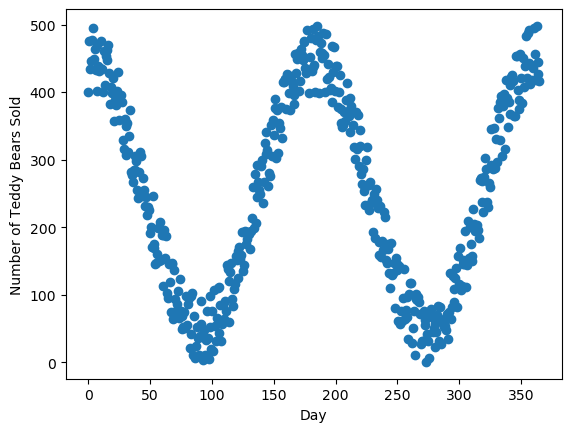

In [10]:
# Create a random synthentic sales dataset for Teddy Bear sales over 1 year
import math, random
import matplotlib.pyplot as plt
day = torch.linspace(0, 365, 500)
teddyBears = 100*(2*torch.cos(day*4*math.pi/365)+torch.rand(500))+200

# Display our Teddy Bear sales data for year 1
plt.scatter(day, teddyBears)
plt.xlabel("Day")
plt.ylabel("Number of Teddy Bears Sold")
plt.show()  

### Step 8 - Train your Neural Network on the Sales Dataset
This section will be new to you and will be covered in the next lesson.  In order to train a neural network, we iterate over the training dataset and monitor the loss function.  The loss should decrease as you continue to train.

In [11]:
# Prepare you input and output data by adding a batch dimension
y=torch.unsqueeze(teddyBears,dim=1)
x=torch.unsqueeze(day, dim=1)

# Setup your training optimizer and specify your loss criteria
optimizer = torch.optim.Adam(net2.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# Train for 5000 iterations
for idx in range(5000):
    pred = net2(x)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (idx % 1000 == 0):
        print (f"Loss: {loss:.2f}")

Loss: 89596.44
Loss: 16424.06
Loss: 12383.18
Loss: 1023.32
Loss: 848.64


#### Expected Result:  
<pre>Loss: 89596.44
Loss: 16424.06
Loss: 12383.18
Loss: 1023.32
Loss: 848.64</pre>Note: Your loss values will likely differ a bit but should decrease with each iteration and end below 1000 as in the example above.

### Step 9 - Compare your Model Predictions with Actuals
Here we should the what your neural network is predicting (red) compared to the actual.  

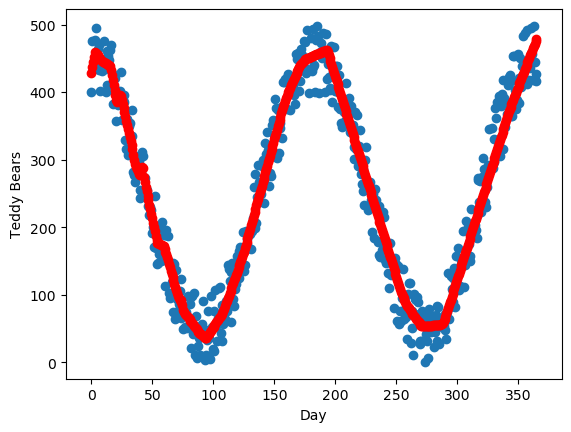

In [12]:
net2.eval()
pred = net2(x)
plt.scatter(day, teddyBears)
plt.scatter(x.detach().numpy()[:], pred.detach().numpy()[:],color="red")
plt.xlabel("Day")
plt.ylabel("Teddy Bears")
plt.show()

#### Expected Result:  
If your model has been defined correctly and trained properly, you should see the red curve following the blue dots.  Your neural network has now been trained and has learned how to map the given day to the amount of expected teddy bear sales for that day!

### Step 10 - Make a Sales Prediction using Trained Network
Now that our network has been trained, we can use it to make a prediction.

In [13]:
# Make a prediction for a day in the year (use a decimal number e.g. 3.0, 10.1)
day = torch.tensor([4.0])
y_pred = net2(day)
print (f"Predicted Number of Sales: {y_pred.item():.0f} Teddy Bears")

Predicted Number of Sales: 457 Teddy Bears


### Key Takeaways

- You built a simple PyTorch neural network
- You explored the model details including the weight and bias values
- You defined a multi-layer neural network
- You trained it on teddy bear sales data and used it to predict sales

Congratulations for finishing the first assingment!  

Keep it going!